# Loan Application Status Prediction

## Adeeb Naiyer
2

# Project Description

This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

## Independent Variables:

1.	Loan_ID - This refer to the unique identifier of the applicant's affirmed purchases

2.	Gender - This refers to either of the two main categories (male and female) into which applicants are divided on the basis of their reproductive functions

3.	Married - This refers to applicant being in a state of matrimony
   
4.	Dependents - This refres to persons who depends on the applicants for survival
   
5.	Education - This refers to number of years in which applicant received systematic instruction, especially at a school or university
    
6.	Self_Employed - This refers to applicant working for oneself as a freelancer or the owner of a business rather than for an employer
    
7.	Applicant Income - This refers to disposable income available for the applicant's use under State law.
    
8.	CoapplicantIncome - This refers to disposable income available for the people that participate in the loan application process alongside the main applicant use under State law.
    
9.	Loan_Amount - This refers to the amount of money an applicant owe at any given time.
    
10.	Loan_Amount_Term - This refers to the duaration in which the loan is availed to the applicant
    
11.	Credit History - This refers to a record of applicant's ability to repay debts and demonstrated responsibility in repaying them.
    
12.	Property_Area - This refers to the total area within the boundaries of the property as set out in Schedule.
    
13.	Loan_Status - This refres to whether applicant is eligible to be availed the Loan requested.
    
You have to build a model that can predict whether the loan of the applicant will be approved(Loan_status) or not on the basis of the details provided in the dataset. 

## Dataset Link-  

•	https://github.com/FlipRoboTechnologies/ML_-Datasets/blob/main/Loan%20Application%20Status/loan_prediction.csv

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import zipfile
warnings.filterwarnings('ignore')

In [2]:
# Retrive the dataset using the raw address
url = "https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv"
df = pd.read_csv(url)

# 1. EDA

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [5]:
df.shape

(614, 13)

In [6]:
df.columns.to_list()

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Loan_Status']

There are 13 columns. Out of which Loan status is the target variable

In [7]:
# checking the types of columns
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None


There are 3 types of datatypes in this dataset and some columns has null values

## Missing values

In [8]:
# checking the null values
miss_val = df.isnull().sum().to_frame("Null values")

# Calculate the % of the null values
miss_val["% of missing"] = round(miss_val['Null values'] / len(df) * 100,2)

miss_val

,Null values,% of missing
Loan_ID,0,0.00
Gender,13,2.12
Married,3,0.49
Dependents,15,2.44
Education,0,0.00
Self_Employed,32,5.21
ApplicantIncome,0,0.00
CoapplicantIncome,0,0.00
LoanAmount,22,3.58
Loan_Amount_Term,14,2.28


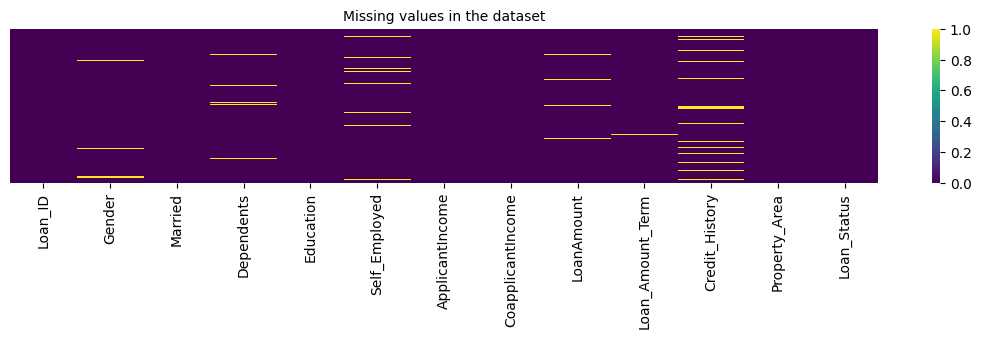

In [9]:
# Let's visualize it using heatmap for dataset
plt.figure(figsize=(14,2))
sns.heatmap(df.isnull(), yticklabels=False, cmap='viridis')
plt.title('Missing values in the dataset', fontsize=10);

## Feature analysis

#### Unique values

In [10]:
# Reviewing the number of unique values in each feature and the target
info_df = df.nunique().to_frame('No. of Unique values')
info_df['type'] = df.dtypes.values

info_df

,No. of Unique values,type
Loan_ID,614,object
Gender,2,object
Married,2,object
Dependents,4,object
Education,2,object
Self_Employed,2,object
ApplicantIncome,505,int64
CoapplicantIncome,287,float64
LoanAmount,203,float64
Loan_Amount_Term,10,float64


#### Observation:

•Loan ID column has the unique values same as the number of rows present. So we can go ahead and drop it since it has no influence on the target. It is just used to identify each record.

•Categorical columns: Gender(2), Married(2), Dependents(4), Education(2), Self_Employed(2), Property_Area(3), Loan_Status(2) 

•The numerical columns: ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term, Credit_History

• numerical but categorical column: Credit_History(2) and Loan_Amount_Term(10)

In [11]:
# Dropping loan ID column

df.drop(['Loan_ID'], axis=1, inplace=True)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [12]:
df.shape

(614, 12)

### Target variable unique values

In [13]:
# Checking the target variable
df['Loan_Status'].value_counts().to_frame()

,count
Loan_Status,
Y,422
N,192


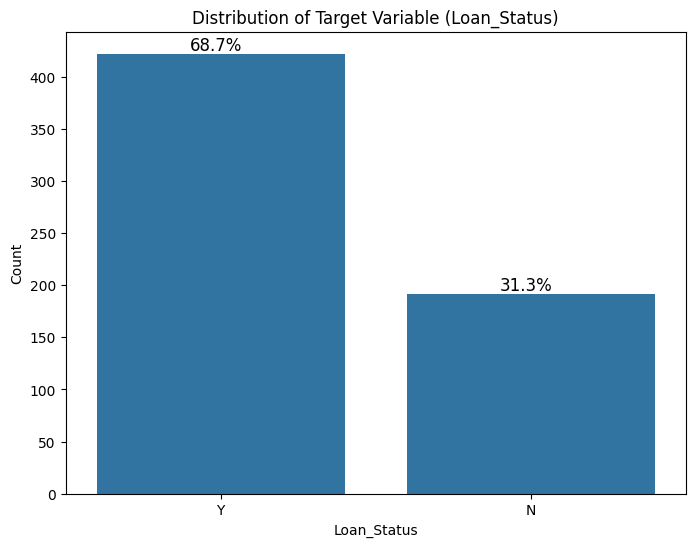

In [14]:
col = 'Loan_Status'
plt.figure(figsize=(8, 6))

# Plot the countplot
ax = sns.countplot(data=df, x=col)

# Calculate percentages
total = len(df[col])
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_height() + 3
    ax.annotate(percentage, (x, y), size=12)

# Customize the plot
plt.title('Distribution of Target Variable (Loan_Status)')
plt.xlabel(col)
plt.ylabel('Count')
plt.show()

Since the target variable is imbalanced with 68.7% stating 'yes' and 31.3% stating 'no', we have to balance the dataset using oversampling technique

## Categorical variables unique values

In [15]:
# Separating Numerical and Categorical columns
cat_col = []
num_col = []

for i in df.dtypes.index:
    if df.dtypes[i] == 'object':
        cat_col.append(i)
    else:
        num_col.append(i)

#  Numerical and Categorical columns
print(f"Categorical Columns:\n {cat_col}\n")
print(f"Numerical Columns:\n {num_col}\n")

Categorical Columns:
 ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']

Numerical Columns:
 ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']



In [16]:
num_cat_col = ['Loan_Amount_Term', 'Credit_History']
print(f"Numerical Columns that represent a category:\n {num_cat_col}\n")

Numerical Columns that represent a category:
 ['Loan_Amount_Term', 'Credit_History']



### categorical col independent variables

In [17]:
# Checking the value counts of the categorical col
for i, col in enumerate(cat_col[1:]):
    print(f"{i+1}.{col}:\n{df[col].value_counts()}\n")

1.Married:
Married
Yes    398
No     213
Name: count, dtype: int64

2.Dependents:
Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

3.Education:
Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64

4.Self_Employed:
Self_Employed
No     500
Yes     82
Name: count, dtype: int64

5.Property_Area:
Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64

6.Loan_Status:
Loan_Status
Y    422
N    192
Name: count, dtype: int64



### Numerical columns but considered categorical independent variable

In [18]:
# Checking the value counts of the Numerical Columns that represent a category:
for i, col in enumerate(num_cat_col):
    print(f"{i+1}.{col}:\n{df[col].value_counts(dropna=False)}\n")

1.Loan_Amount_Term:
Loan_Amount_Term
360.0    512
180.0     44
480.0     15
NaN       14
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

2.Credit_History:
Credit_History
1.0    475
0.0     89
NaN     50
Name: count, dtype: int64



### Numerical columns independent variables

In [19]:
# Select the rest of the numerical columns
num_col = [col for col in num_col if col not in num_cat_col]
num_col

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

In [20]:
# Checking the value counts of the numerical independent variables
for i, col in enumerate(num_col):
    print(f"{i+1}.{col}:\n{df[col].value_counts()}\n")

1.ApplicantIncome:
ApplicantIncome
2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: count, Length: 505, dtype: int64

2.CoapplicantIncome:
CoapplicantIncome
0.0       273
2500.0      5
2083.0      5
1666.0      5
2250.0      3
         ... 
2791.0      1
1010.0      1
1695.0      1
2598.0      1
240.0       1
Name: count, Length: 287, dtype: int64

3.LoanAmount:
LoanAmount
120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: count, Length: 203, dtype: int64



## Statistical summary of the data

In [21]:
# Summary statistics of numerical columns
stats = df.describe()

stats

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [22]:
# Contrast the mean with the 50th percentile
(stats.loc['mean',:] - stats.loc['50%',:]).sort_values(ascending=False)

ApplicantIncome      1590.959283
CoapplicantIncome     432.745798
LoanAmount             18.412162
Credit_History         -0.157801
Loan_Amount_Term      -18.000000
dtype: float64

### Observation: 

•There are some null values in some columns

•The mean is larger than the median in  ApplicantIncome, CoapplicantIncome, and LoanAmount which means the data could be skewed to the right in these columns.

Features are noon the same scale

In [23]:

# Contrast the maximum value in each colum with 2 times the std plus the mean 
(stats.loc['max',:] - (stats.loc['mean',:] + 2 * stats.loc['std',:] ) ).sort_values(ascending=False)

ApplicantIncome      63378.457370
CoapplicantIncome    34193.257464
LoanAmount             382.413187
Loan_Amount_Term         7.759180
Credit_History          -0.571955
dtype: float64

## Observation:

•There could be present outliers in the columns ApplicantIncome, CoapplicantIncome, and LoanAmount,

In [24]:
# non numeric columns
df.describe(exclude=[np.number])

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,601,611,599,614,582,614,614
unique,2,2,4,2,2,3,2
top,Male,Yes,0,Graduate,No,Semiurban,Y
freq,489,398,345,480,500,233,422


## Data visualisation

### univariate analysis

#### Target feature:

In [25]:
# Distribution of Loan Status
df['Loan_Status'].value_counts().to_frame()

,count
Loan_Status,
Y,422
N,192


### cat_col

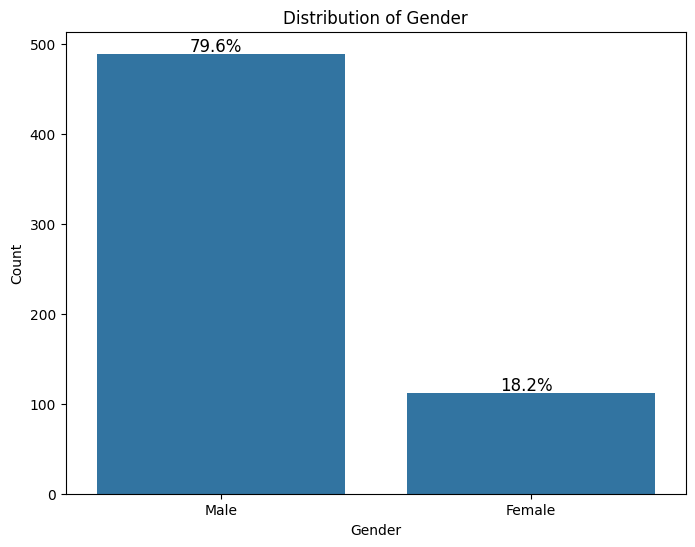

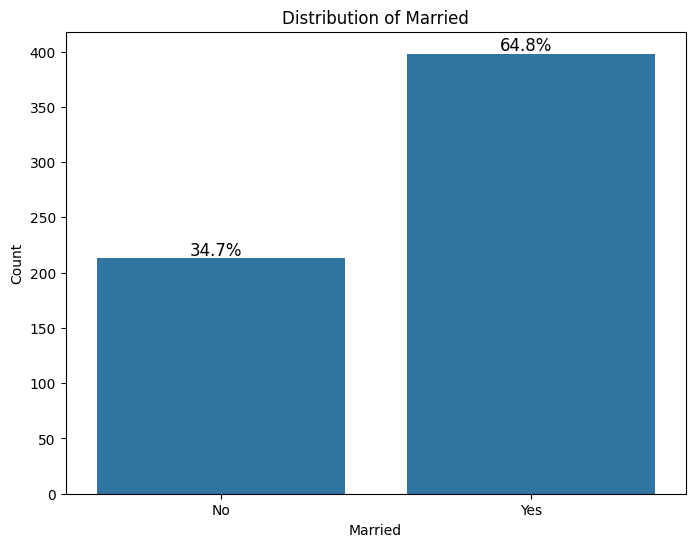

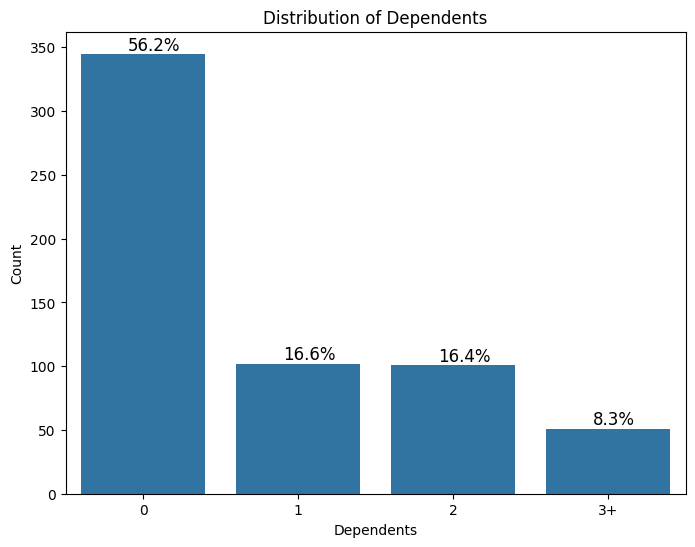

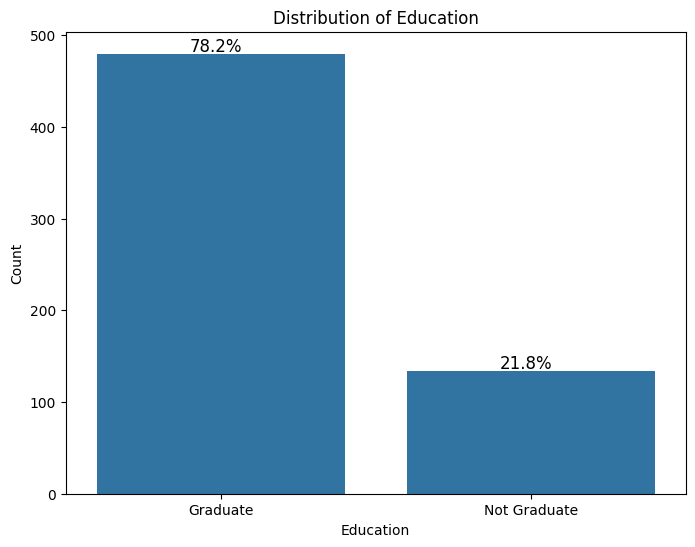

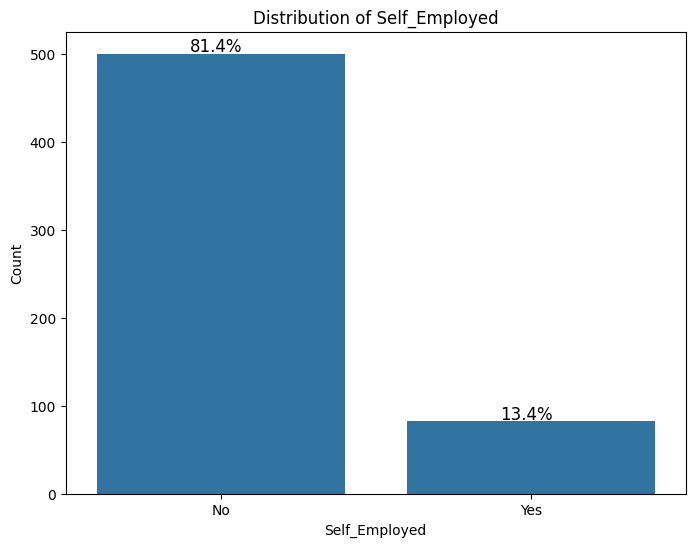

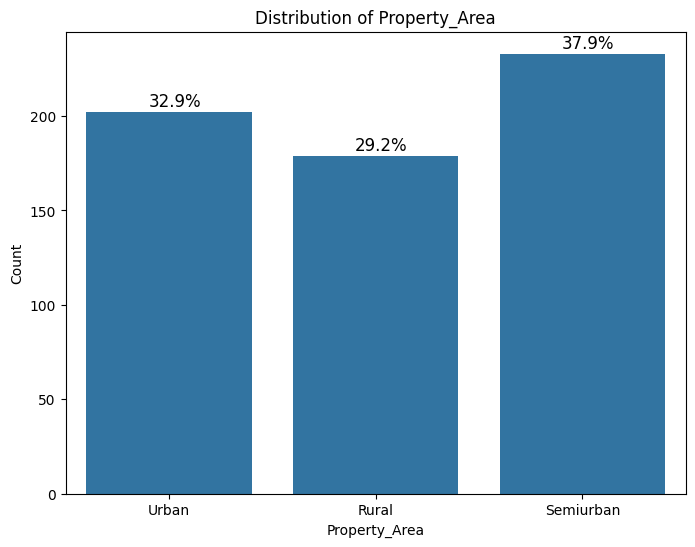

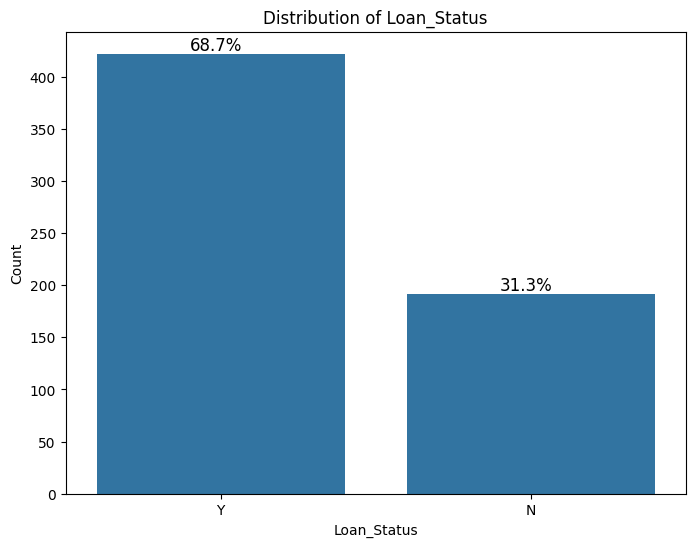

In [26]:
for col in cat_col[:]:
    plt.figure(figsize=(8, 6))
    
    # Plot the countplot
    ax = sns.countplot(data=df, x=col)
    
    # Calculate percentages
    total = len(df[col])
    for p in ax.patches:
        percentage = f'{100 * p.get_height() / total:.1f}%'
        x = p.get_x() + p.get_width() / 2 - 0.1
        y = p.get_height() + 3
        ax.annotate(percentage, (x, y), size=12)
    
    # Customize the plot
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

#### num_cat_col(numerical columns but analysed as categorical)

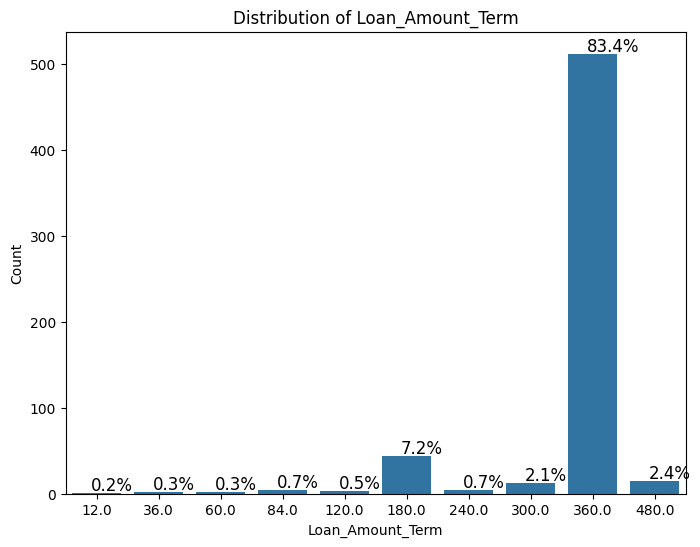

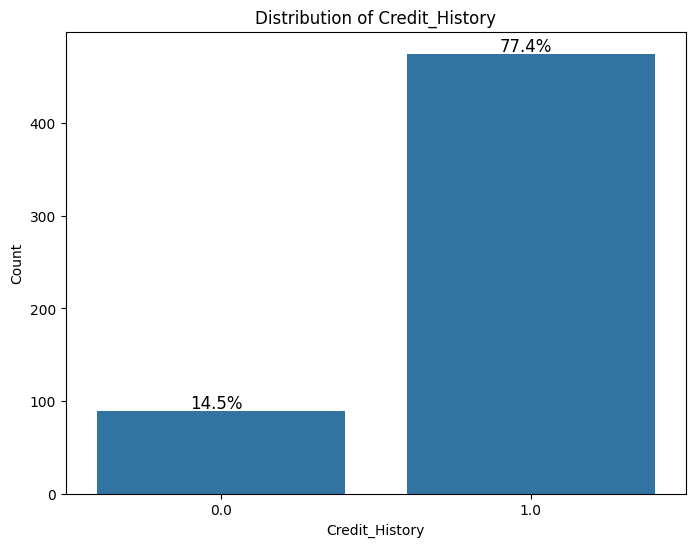

In [27]:
for col in num_cat_col[:]:
    plt.figure(figsize=(8, 6))
    
    # Plot the countplot
    ax = sns.countplot(data=df, x=col)
    
    # Calculate percentages
    total = len(df[col])
    for p in ax.patches:
        percentage = f'{100 * p.get_height() / total:.1f}%'
        x = p.get_x() + p.get_width() / 2 - 0.1
        y = p.get_height() + 3
        ax.annotate(percentage, (x, y), size=12)
    
    # Customize the plot
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

#### Num_col

In [28]:

# Select the rest of the numerical columns
num_col = [col for col in num_col if col not in num_cat_col]
num_col

# List of numerical columns
for i,col in enumerate(num_col):
    print(f"{i+1}. {col}")

1. ApplicantIncome
2. CoapplicantIncome
3. LoanAmount


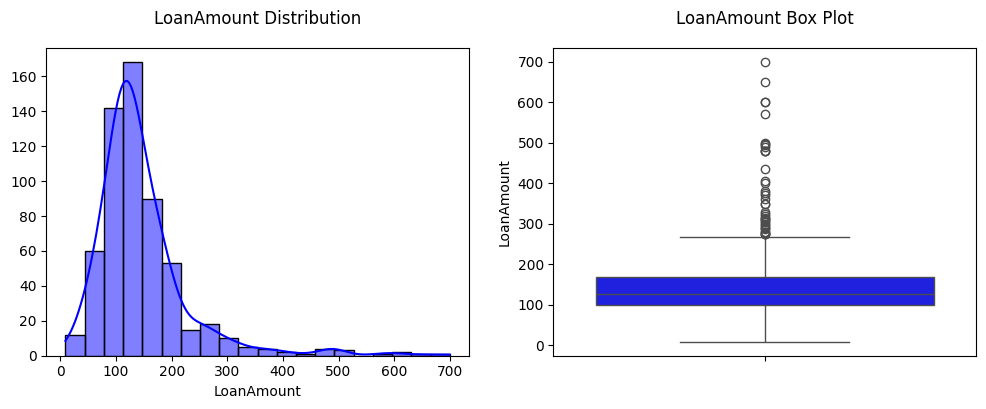

Skewness of LoanAmount : 2.677551679256059


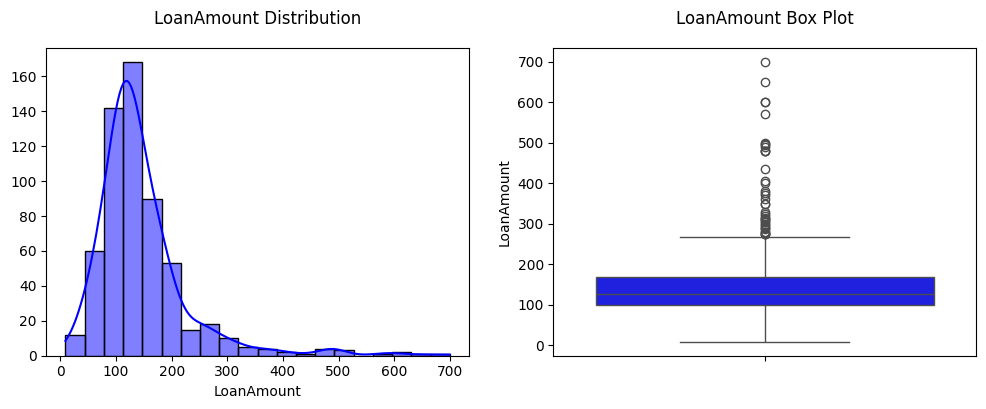

Skewness of LoanAmount : 2.677551679256059


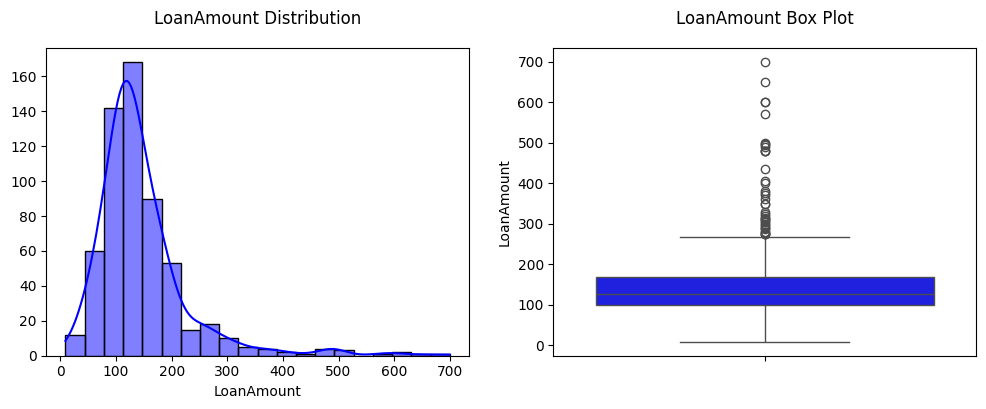

Skewness of LoanAmount : 2.677551679256059


In [29]:
for i  in num_col:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    sns.histplot(df[col], kde=True , bins=20, ax=axes[0], color='blue')
    sns.boxplot(df[col], ax=axes[1], color='blue')

    axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
    axes[0].set_ylabel('', size=10, labelpad=8)

    axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

    plt.show()

# Show the skewness of Age
    print(f"Skewness of {col} : {df[col].skew()}")

## Bivariate analysis

### realatinioship between numerical columns and target columns

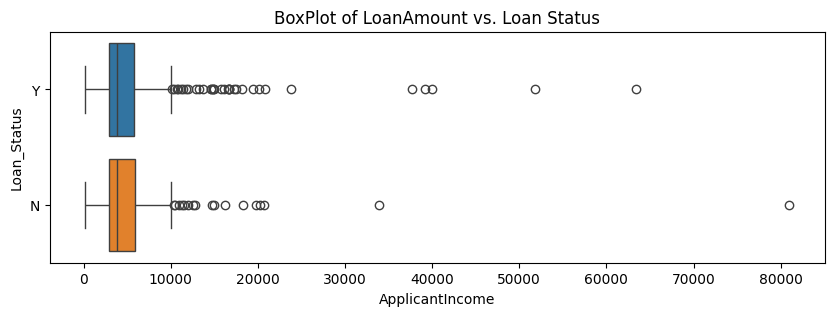

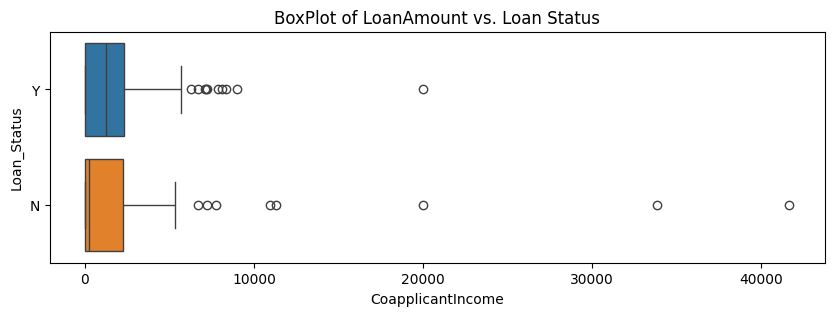

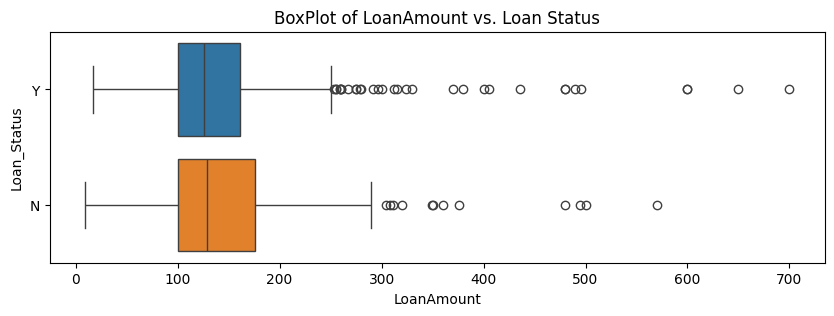

In [30]:

# Visualizing and comparing each independent variable with target
for i in num_col:
    #col = 'ApplicantIncome'
    plt.figure(figsize=(10, 3))
    sns.boxplot(data=df[[i,'Loan_Status']], x=i, y='Loan_Status', hue='Loan_Status')
    plt.title(f"BoxPlot of {col} vs. Loan Status")
    
    plt.show()

#### relationship between target column and categorical columnn

In [31]:
def show_percentage(ax, total):
    ''' Shows the representative percentage in each bar in a countplot.'''
    for p in ax.patches:
        percentage = f"{100 * p.get_height()/total:.1f} %"
        x = p.get_x() + p.get_width() / 2 - 0.02
        y = p.get_height()
        ax.annotate(percentage, (x, y), fontsize=10, ha='center')

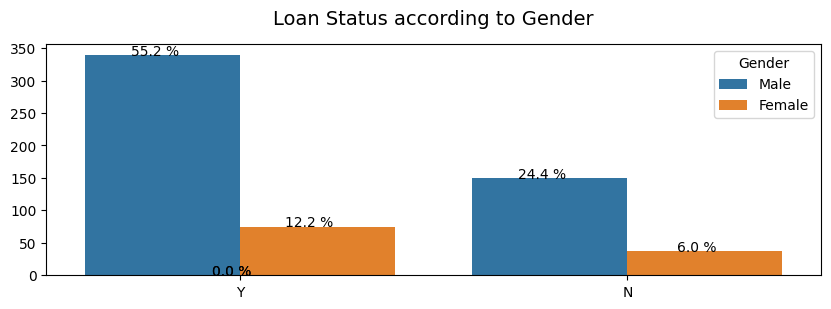

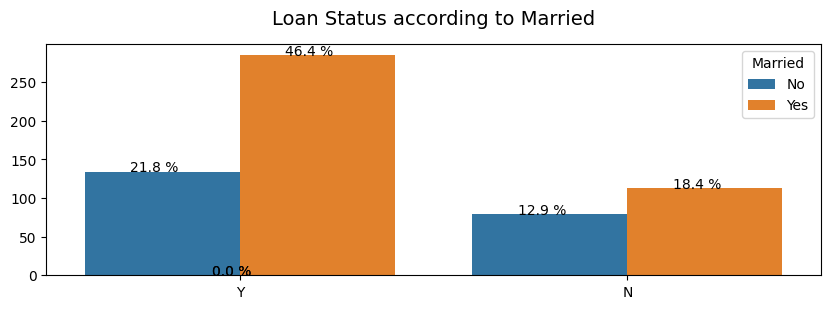

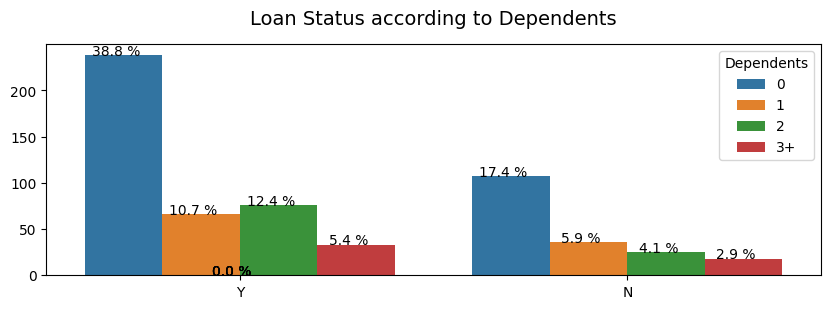

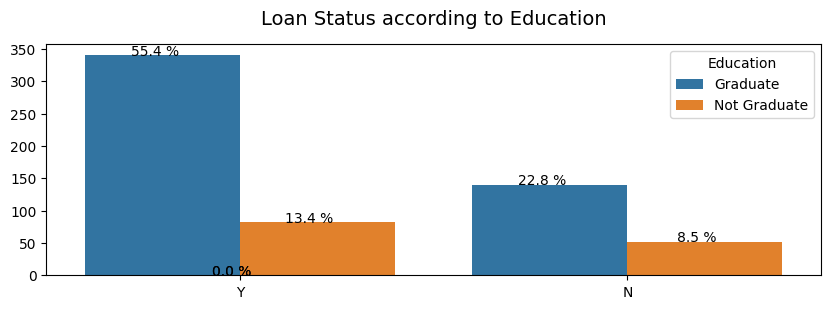

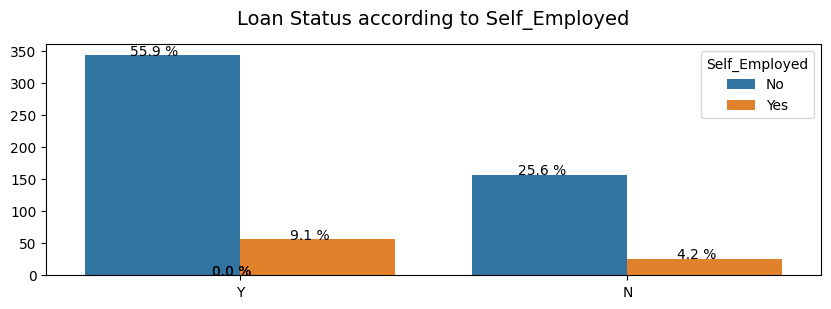

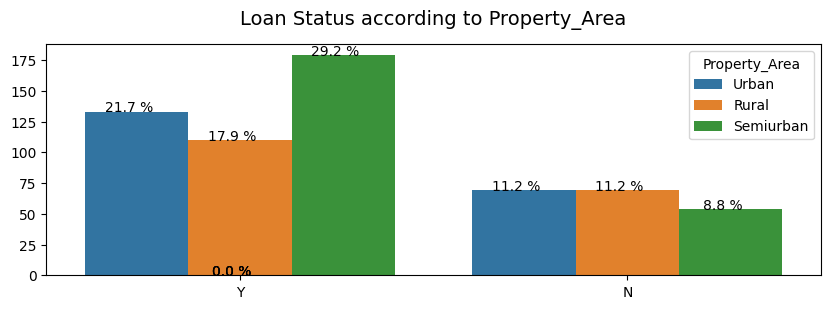

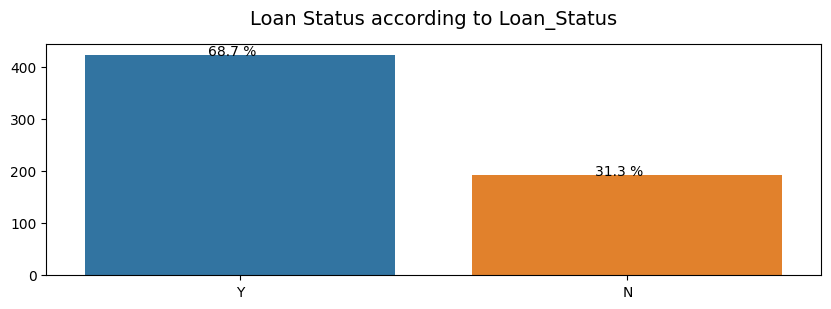

In [32]:
for i in cat_col:
        
    plt.figure(figsize=(10, 3))
    ax = sns.countplot(x='Loan_Status', hue=i, data=df)
    show_percentage(ax, len(df)) 

    plt.xlabel('', size=10, labelpad=8)
    plt.ylabel('', size=10, labelpad=8)
    plt.title(f"Loan Status according to {i}", size=14, y=1.05);

#### Relationship between numerical column ana;lysed as categorical and the target column

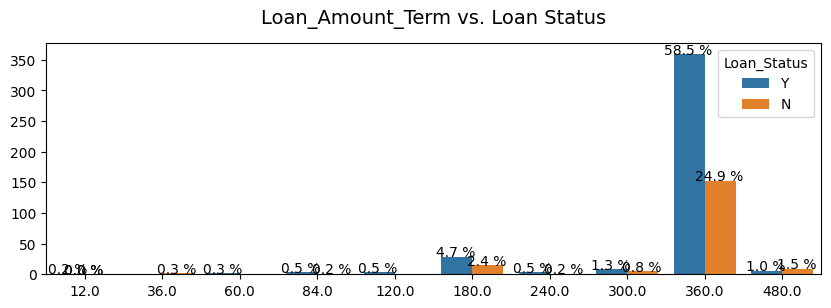

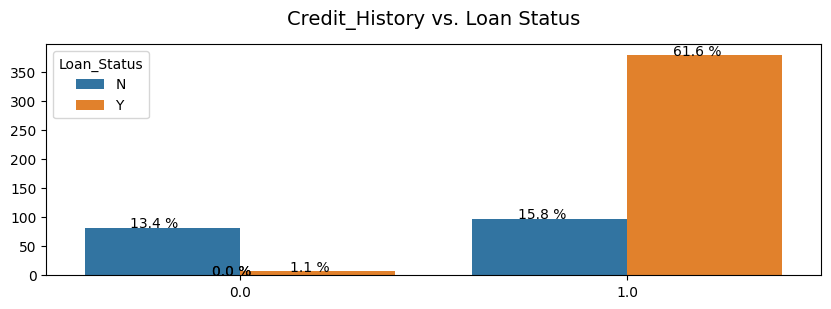

In [33]:
for i in num_cat_col:

    plt.figure(figsize=(10, 3))
    ax = sns.countplot(x=i, hue='Loan_Status', data=df)
    show_percentage(ax, len(df)) 

    plt.xlabel('', size=10, labelpad=8)
    plt.ylabel('', size=10, labelpad=8)

    plt.title(f"{i} vs. Loan Status", size=14, y=1.05);

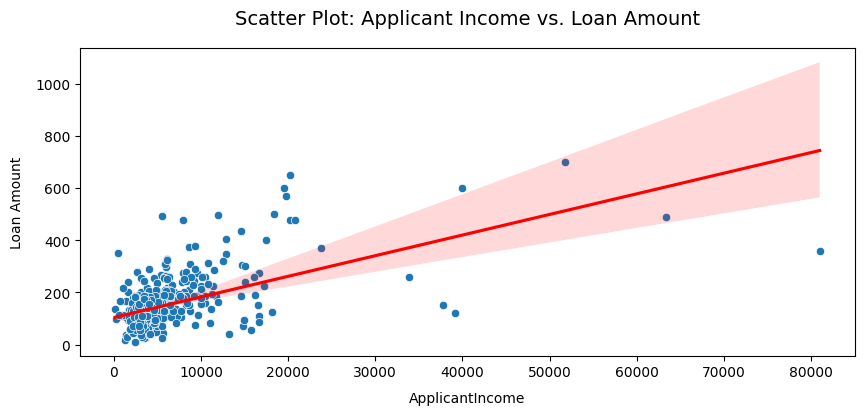

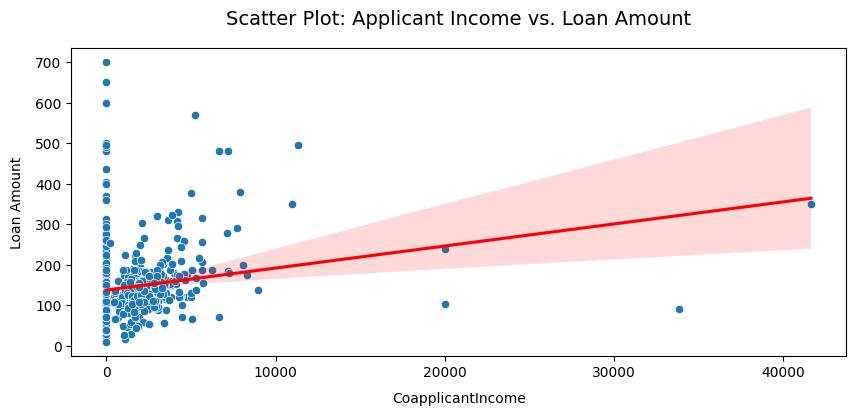

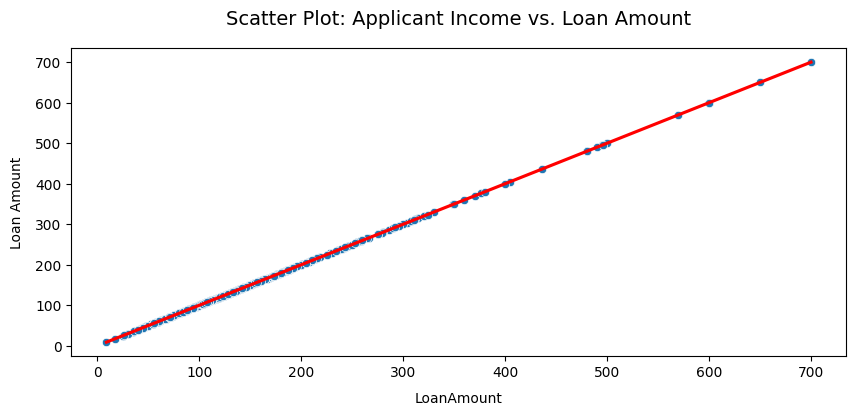

In [34]:
for i in num_col:
        
    plt.figure(figsize=(10, 4))
    ax = sns.scatterplot(x=i, y='LoanAmount', data=df)
    sns.regplot(x=i, y='LoanAmount', data=df, scatter=False, ax=ax, color='r')

    plt.xlabel(i, size=10, labelpad=8)
    plt.ylabel('Loan Amount', size=10, labelpad=8)
    plt.title('Scatter Plot: Applicant Income vs. Loan Amount', size=14, y=1.05);

## Multivariate Analysis

### Pairplot

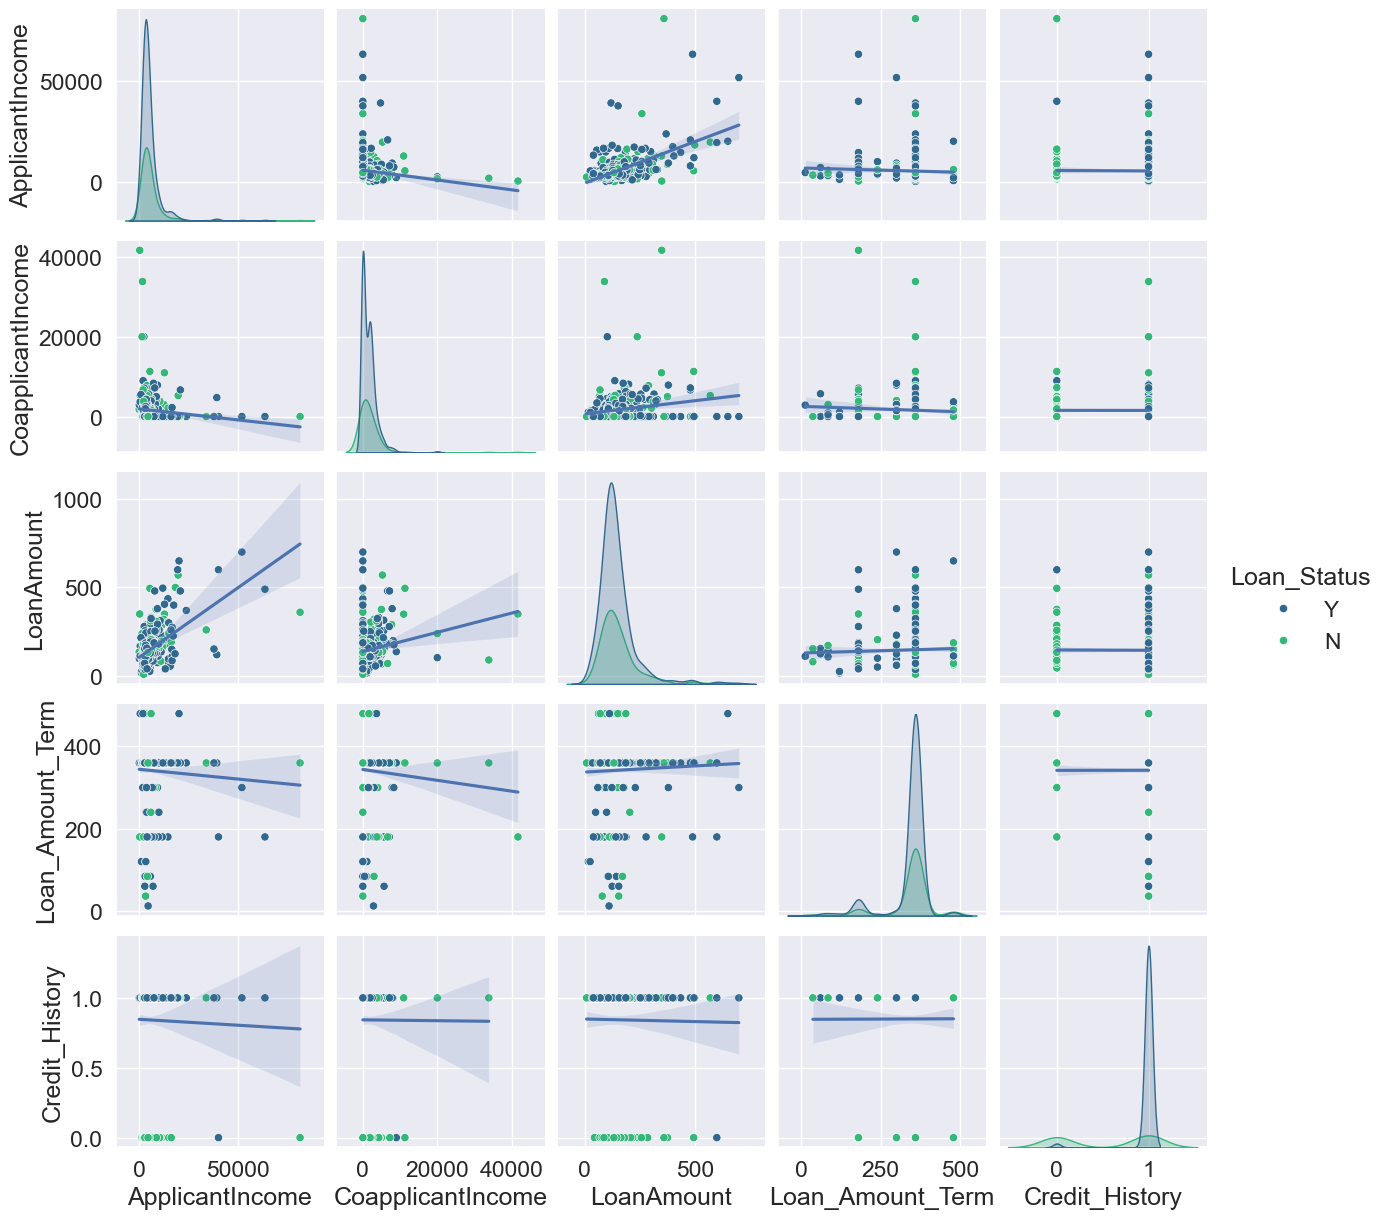

In [35]:
sns.set(font_scale=1.5)  
grid = sns.pairplot(df, hue='Loan_Status', palette = "viridis")

# Add a regression line for non-diagonal plots
for ax in grid.axes.flat[1:-1]: # first and last axes are not considered
    if ax.get_xlabel() != ax.get_ylabel():
        sns.regplot(data=df, x=ax.get_xlabel(), y=ax.get_ylabel(), scatter=False, ax=ax, color='b')

plt.show()

## Encoding the target variable

In [36]:
df['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

In [37]:
df['Loan_Status'] = df['Loan_Status'].map({'Y': 1, 'N': 0})
df.head()


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


## Correlation between target variable and independent variables.

In [38]:
# Select only the numerical columns
numerical_df = df.select_dtypes(include=['int64', 'float64'])

# Compute the correlation matrix
cor = numerical_df.corr()

# Display the correlation matrix
cor


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715,-0.004710
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056,-0.059187
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433,-0.037318
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470,-0.021268
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000,0.561678
Loan_Status,-0.004710,-0.059187,-0.037318,-0.021268,0.561678,1.000000


In [39]:
# Listing the correlation coeficients with the target variable 
corr_df = cor.unstack().sort_values(ascending=False).reset_index()
corr_df.columns = ['Feature A', 'Feature B', 'Corr coef']
corr_df[(corr_df['Feature A'] == 'Loan_Status') ]

,Feature A,Feature B,Corr coef
5,Loan_Status,Loan_Status,1.000000
9,Loan_Status,Credit_History,0.561678
18,Loan_Status,ApplicantIncome,-0.004710
24,Loan_Status,Loan_Amount_Term,-0.021268
27,Loan_Status,LoanAmount,-0.037318
30,Loan_Status,CoapplicantIncome,-0.059187


The target column has a medium positive correlation with the credit history column and negative correlation with all other numeric columns

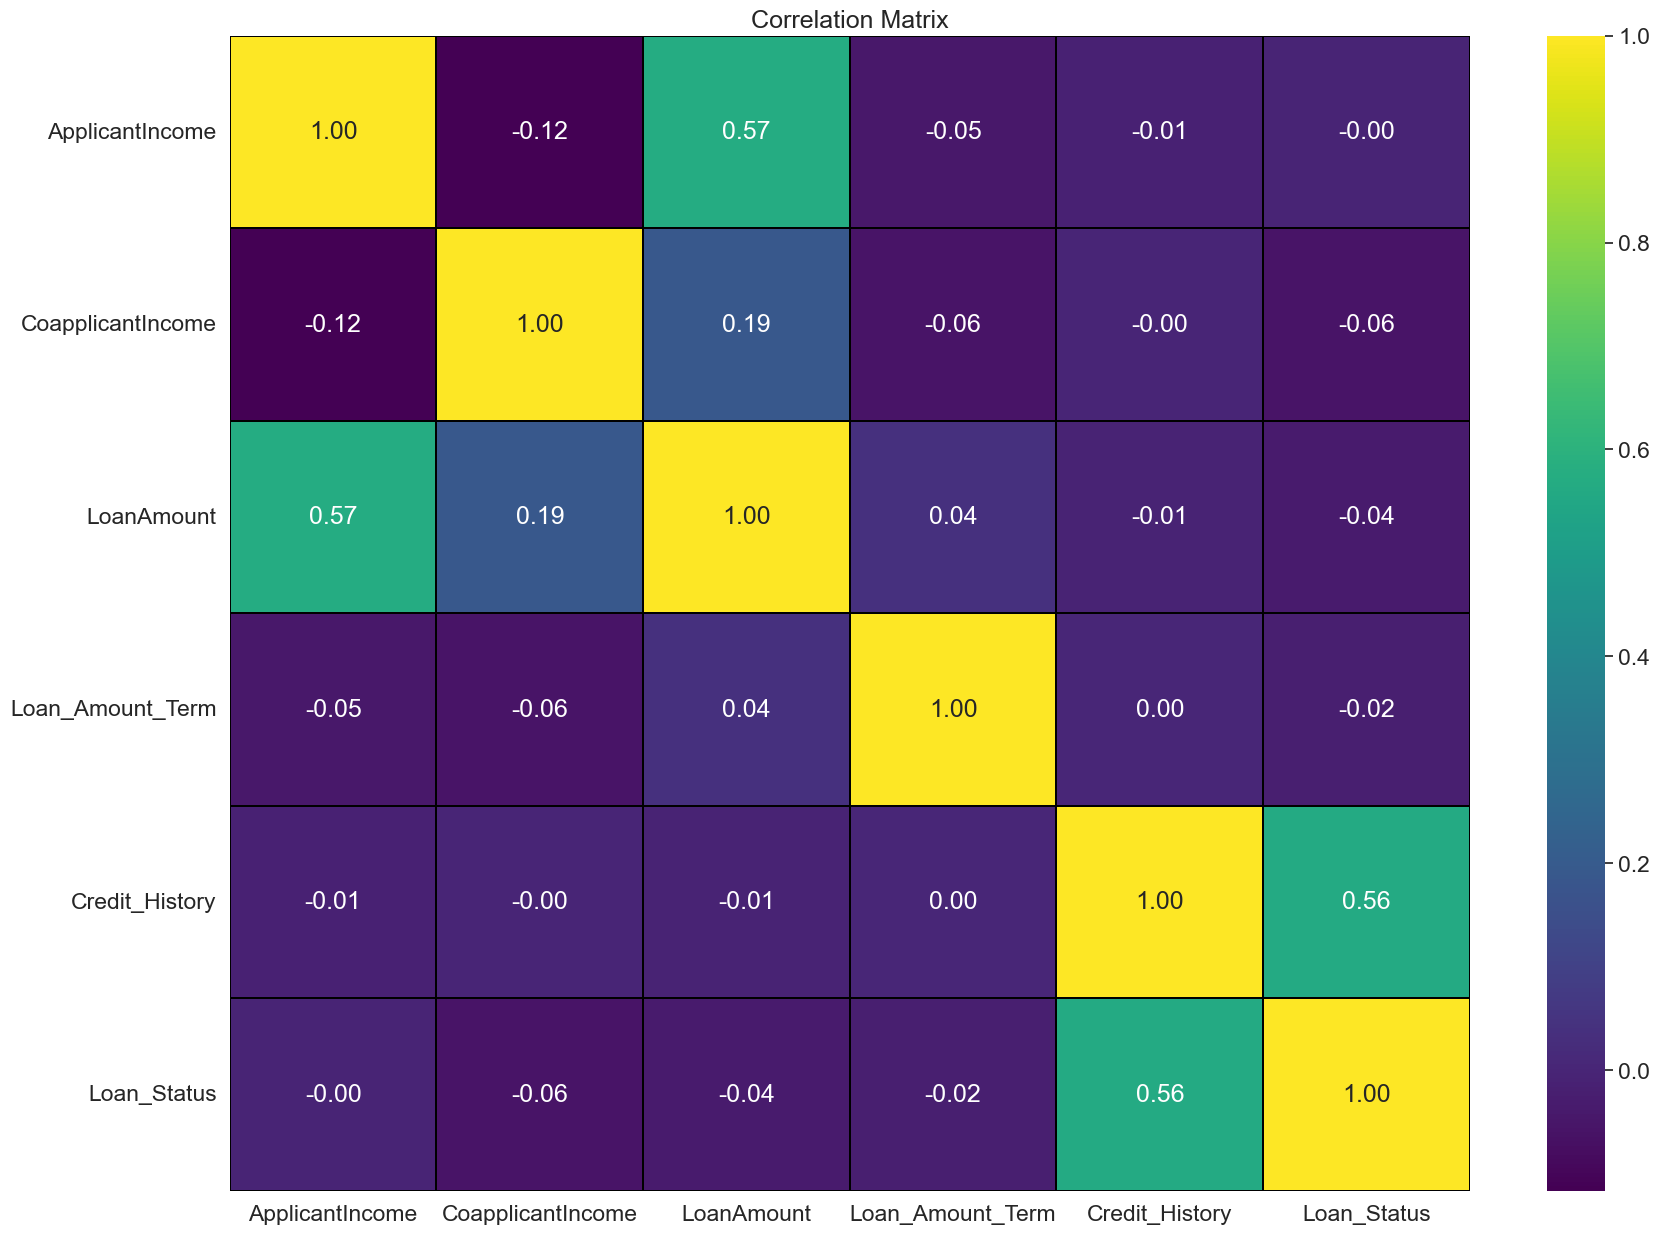

In [40]:
# Visualizing the correlation matrix by plotting heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(cor, linewidths = 0.1, fmt = ".2f", linecolor = 'black', cmap='viridis', annot=True)
plt.yticks(rotation = 0)
plt.title('Correlation Matrix')
plt.show()

## observation:

• The target is highly correlated with Credit history

• The loan amount is correlated with applicant income and coapplicant income

# 2. Preprocessing Data

### Missing values

In [41]:
miss_val = miss_val[miss_val['% of missing'] > 0]
miss_val

,Null values,% of missing
Gender,13,2.12
Married,3,0.49
Dependents,15,2.44
Self_Employed,32,5.21
LoanAmount,22,3.58
Loan_Amount_Term,14,2.28
Credit_History,50,8.14


For the columns with less than 2.5% of missing values we will drop them. For the other columns we will impute the missing values

## Dropppig missing values

In [42]:
cols_to_drop = miss_val[miss_val['% of missing'] < 2.4].index.to_list()
cols_to_drop

['Gender', 'Married', 'Loan_Amount_Term']

In [43]:
# Dropping the missing values with % of missing less than 2.4%
df_new = df.dropna(subset=cols_to_drop)

print(f"{df.shape[0] - df_new.shape[0]} rows with missing values were deleted.")
print(f"This represent {round((df.shape[0] - df_new.shape[0]) / df.shape[0] *100, 2)}% of the data.")
print(f"In the new dataset there are {df_new.shape[0]} rows and {df.shape[1]} columns.")
df = df_new.copy()

30 rows with missing values were deleted.
This represent 4.89% of the data.
In the new dataset there are 584 rows and 12 columns.


## Imputing missing values

In [44]:
cols_with_misval = miss_val[miss_val['% of missing'] > 2.4].index.to_list()
cols_with_misval

['Dependents', 'Self_Employed', 'LoanAmount', 'Credit_History']

In [45]:
# listing the possible imputation values for LoanAmount column
col = 'LoanAmount'
print(f"Column={col} Mode={df[col].mode()[0]} Median(50%)={df[col].median():.6f}  Mean={df[col].mean():.6f}")

Column=LoanAmount Mode=120.0 Median(50%)=128.000000  Mean=145.683837


In [46]:
# listing the possible imputation values for LoanAmount column
col = 'Credit_History'
print(f"Column={col} Mode={df[col].mode()[0]} Median(50%)={df[col].median():.6f}  Mean={df[col].mean():.6f}")

Column=Credit_History Mode=1.0 Median(50%)=1.000000  Mean=0.850467


For loan amount we will use median

In [47]:
for col in cols_with_misval:
    # Counting the number of null values in the column 
    print(f"Missing values in {col}: {df[col].isnull().sum()}")

    if(col == 'LoanAmount'):
        # Get the median 
        impute_value = round(df[col].median(),1) 
        print(f"Impute the missing values in {col} with the median: {impute_value}")

        # Impute the missing values using the mode
        df[col].fillna(impute_value, inplace=True)  # Fill missing values with the impute value
    else:
        # Get the mode 
        mode_value = df[col].mode()[0]  #the [0] is used to get the first mode if there are multiple
        print(f"Impute the missing values with the mode {mode_value}")

        # Impute the missing values using the mode
        df[col].fillna(mode_value, inplace=True)  # Fill missing values with the mode value

    print(f"Missing values in {col}: {df[col].isnull().sum()}\n")

Missing values in Dependents: 11
Impute the missing values with the mode 0
Missing values in Dependents: 0

Missing values in Self_Employed: 31
Impute the missing values with the mode No
Missing values in Self_Employed: 0

Missing values in LoanAmount: 21
Impute the missing values in LoanAmount with the median: 128.0
Missing values in LoanAmount: 0

Missing values in Credit_History: 49
Impute the missing values with the mode 1.0
Missing values in Credit_History: 0



In [48]:
 df.isnull().sum().sum()

0

## Encoding Categorical features

In [49]:
 # Checking the unique values of the categorical independent variables
for i, col in enumerate(cat_col[:-1]):
    print(f"{i+1}.{col}:\n  {df[col].unique()}\n")

1.Gender:
  ['Male' 'Female']

2.Married:
  ['No' 'Yes']

3.Dependents:
  ['0' '1' '2' '3+']

4.Education:
  ['Graduate' 'Not Graduate']

5.Self_Employed:
  ['No' 'Yes']

6.Property_Area:
  ['Urban' 'Rural' 'Semiurban']



The columns will be encodes manually as follows:

Gender: (1=Female, 2=Male)

Married : (1=No, 2=Yes)

Dependents : (0=0, 1=1, 2=2, 3=3+)

Education : (1=Graduate, 3=Not Graduate)

Self_Employed : (1=No, 2=Yes)

For Property_Area will use One-Hot Encoding 

In [50]:
df_backup = df.copy()


In [51]:
# Encoding the features manually

df['Gender'] = df['Gender'].map({'Female': 1, 'Male': 2})
df['Married'] = df['Married'].map({'Yes': 2, 'No': 1})
df['Dependents'] = df['Dependents'].map({'0': 0, '1': 1, '2': 2, '3+': 3})
df['Education'] = df['Education'].map({'Graduate': 1, 'Not Graduate': 3})
df['Self_Employed'] = df['Self_Employed'].map({'Yes': 2, 'No': 1})

display(df.head())

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,2,1,0,1,1,5849,0.0,128.0,360.0,1.0,Urban,1
1,2,2,1,1,1,4583,1508.0,128.0,360.0,1.0,Rural,0
2,2,2,0,1,2,3000,0.0,66.0,360.0,1.0,Urban,1
3,2,2,0,3,1,2583,2358.0,120.0,360.0,1.0,Urban,1
4,2,1,0,1,1,6000,0.0,141.0,360.0,1.0,Urban,1


In [52]:

# One-Hot Encoding - column  Property_Area
df = pd.get_dummies(df, columns=['Property_Area'], prefix=['p_area'])

In [53]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,p_area_Rural,p_area_Semiurban,p_area_Urban
0,2,1,0,1,1,5849,0.0,128.0,360.0,1.0,1,False,False,True
1,2,2,1,1,1,4583,1508.0,128.0,360.0,1.0,0,True,False,False
2,2,2,0,1,2,3000,0.0,66.0,360.0,1.0,1,False,False,True
3,2,2,0,3,1,2583,2358.0,120.0,360.0,1.0,1,False,False,True
4,2,1,0,1,1,6000,0.0,141.0,360.0,1.0,1,False,False,True


In [54]:
# Convert boolean columns to integers
bool_columns = df.select_dtypes(include='bool').columns
df[bool_columns] = df[bool_columns].astype(int)

# Display the DataFrame
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,p_area_Rural,p_area_Semiurban,p_area_Urban
0,2,1,0,1,1,5849,0.0,128.0,360.0,1.0,1,0,0,1
1,2,2,1,1,1,4583,1508.0,128.0,360.0,1.0,0,1,0,0
2,2,2,0,1,2,3000,0.0,66.0,360.0,1.0,1,0,0,1
3,2,2,0,3,1,2583,2358.0,120.0,360.0,1.0,1,0,0,1
4,2,1,0,1,1,6000,0.0,141.0,360.0,1.0,1,0,0,1


## Removing outliers

Applying zscore

In [55]:
import numpy as np
import pandas as pd
from scipy.stats import zscore

# Select only numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Compute z-scores for numerical columns
df[numerical_cols] = df[numerical_cols].apply(zscore)

# Define threshold for identifying outliers (e.g., z-score > 3 or < -3)
threshold = 3
outliers = (np.abs(df[numerical_cols]) > threshold).any(axis=1)

# Display rows containing outliers
df[outliers]


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,p_area_Rural,p_area_Semiurban,p_area_Urban
9,0.476331,0.735457,0.247232,-0.527162,-0.386790,1.282854,3.138253,2.489465,0.277546,0.39841,-1.492153,0,1,0
14,0.476331,0.735457,1.242980,-0.527162,-0.386790,-0.685882,-0.182505,-1.562969,-3.406252,0.39841,0.670173,0,0,1
68,0.476331,0.735457,2.238728,1.896952,2.585384,0.303603,-0.547446,-0.244708,-4.327202,0.39841,0.670173,0,0,1
94,0.476331,-1.359699,-0.748516,1.896952,-0.386790,-0.289986,-0.547446,-1.465320,-3.406252,0.39841,0.670173,0,1,0
130,0.476331,-1.359699,-0.748516,-0.527162,2.585384,2.532290,-0.547446,6.163509,2.119446,0.39841,0.670173,0,0,1
133,0.476331,0.735457,-0.748516,-0.527162,2.585384,-0.317448,-0.547446,-1.465320,-3.406252,0.39841,0.670173,0,1,0
155,0.476331,0.735457,2.238728,-0.527162,-0.386790,5.915234,-0.547446,5.553202,-2.485302,-2.50998,0.670173,0,1,0
177,0.476331,0.735457,2.238728,-0.527162,-0.386790,0.033418,3.249819,4.271559,0.277546,-2.50998,-1.492153,0,1,0
183,0.476331,0.735457,0.247232,-0.527162,-0.386790,4.865708,-0.547446,1.403119,0.277546,0.39841,-1.492153,0,1,0
185,0.476331,0.735457,-0.748516,-0.527162,2.585384,5.769907,1.048749,-0.305738,0.277546,0.39841,0.670173,0,1,0


In [56]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
numerical_cols = numerical_cols.drop('Loan_Status', errors='ignore')

# Compute z-scores for numerical columns excluding 'Loan_Status'
df[numerical_cols] = df[numerical_cols].apply(zscore)

# Define threshold for identifying outliers (e.g., z-score > 3 or < -3)
threshold = 3
outliers = np.abs(df[numerical_cols]) > threshold

# Filter out rows with outliers
df_filtered = df[~outliers.any(axis=1)]

# Calculate and print statistics
deleted_rows = df.shape[0] - df_filtered.shape[0]
deleted_percentage = round((deleted_rows / df.shape[0]) * 100, 2)
print(f"{deleted_rows} rows with outliers were deleted.")
print(f"This represents {deleted_percentage}% of the data.")
print("Remaining DataFrame:")
df_filtered.head()

35 rows with outliers were deleted.
This represents 5.99% of the data.
Remaining DataFrame:


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,p_area_Rural,p_area_Semiurban,p_area_Urban
0,0.476331,-1.359699,-0.748516,-0.527162,-0.386790,0.090218,-0.547446,-0.208089,0.277546,0.39841,0.670173,0,0,1
1,0.476331,0.735457,0.247232,-0.527162,-0.386790,-0.125725,-0.040696,-0.208089,0.277546,0.39841,-1.492153,1,0,0
2,0.476331,0.735457,-0.748516,-0.527162,2.585384,-0.395740,-0.547446,-0.964869,0.277546,0.39841,0.670173,0,0,1
3,0.476331,0.735457,-0.748516,1.896952,-0.386790,-0.466868,0.244939,-0.305738,0.277546,0.39841,0.670173,0,0,1
4,0.476331,-1.359699,-0.748516,-0.527162,-0.386790,0.115974,-0.547446,-0.049410,0.277546,0.39841,0.670173,0,0,1


In [57]:
# Example: Convert 'Loan_Status' column to float if it's not already
df_filtered['Loan_Status'] = df_filtered['Loan_Status'].astype(float)


In [58]:
# Convert Loan_Status to 1 if > 0.5, else 0
df_filtered['Loan_Status'] = df_filtered['Loan_Status'].apply(lambda x: 1 if x > 0.5 else 0)


In [59]:
df_filtered

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,p_area_Rural,p_area_Semiurban,p_area_Urban
0,0.476331,-1.359699,-0.748516,-0.527162,-0.386790,0.090218,-0.547446,-0.208089,0.277546,0.39841,1,0,0,1
1,0.476331,0.735457,0.247232,-0.527162,-0.386790,-0.125725,-0.040696,-0.208089,0.277546,0.39841,0,1,0,0
2,0.476331,0.735457,-0.748516,-0.527162,2.585384,-0.395740,-0.547446,-0.964869,0.277546,0.39841,1,0,0,1
3,0.476331,0.735457,-0.748516,1.896952,-0.386790,-0.466868,0.244939,-0.305738,0.277546,0.39841,1,0,0,1
4,0.476331,-1.359699,-0.748516,-0.527162,-0.386790,0.115974,-0.547446,-0.049410,0.277546,0.39841,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,-2.099383,-1.359699,-0.748516,-0.527162,-0.386790,-0.412797,-0.547446,-0.903839,0.277546,0.39841,1,1,0,0
610,0.476331,0.735457,2.238728,-0.527162,-0.386790,-0.207088,-0.547446,-1.282229,-2.485302,0.39841,1,1,0,0
611,0.476331,0.735457,0.247232,-0.527162,-0.386790,0.469398,-0.466796,1.317676,0.277546,0.39841,1,0,0,1
612,0.476331,0.735457,1.242980,-0.527162,-0.386790,0.385989,-0.547446,0.512072,0.277546,0.39841,1,0,0,1


## Skewness correction

In [60]:
# Checking the skewness in the data
df_skew = df_filtered.skew().sort_values(ascending=False).to_frame("Skew")
df_skew

,Skew
Self_Employed,2.315668
ApplicantIncome,2.165477
CoapplicantIncome,1.383736
Education,1.314772
LoanAmount,1.135379
Dependents,1.017513
p_area_Rural,0.881920
p_area_Urban,0.744209
p_area_Semiurban,0.516808
Married,-0.615177


We are going to consider the skewness > 0.5 and <-0.5 and apply the transformation methods to remove it

In [61]:
# Checking skewness using cuberoot method and log method
skew_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
df_transformed = pd.DataFrame()

for col in skew_columns:
    df_transformed[f"{col}_cbrt"] = np.cbrt(df_filtered[col])
    df_transformed[f"{col}_log"] = np.log(df_filtered[col])
    df_transformed[f"{col}_sqrt"] = np.sqrt(df_filtered[col])
        
# Adding the other columns
df_transformed = pd.concat([df_transformed, df_filtered[skew_columns]], axis=1)

In [62]:
# Comparing which transform method give better results
df_comp = df_transformed.skew().sort_index(ascending=False).to_frame("Skewness")

# Reset the index and identify the feature
df_comp.reset_index(inplace=True)
df_comp['feature'] = df_comp['index'].str.extract(r'^(.*)_.*')
df_comp['Skewness_abs'] = abs(df_comp['Skewness'])

# Check the calculated skeweness for 
display(df_comp[df_comp['feature'] == 'ApplicantIncome'] )

# Drop the records with no valid skewness
df_comp = df_comp[~df_comp.Skewness.isnull()]

# Find the indexes of the rows with the minimum 'Skewness_abs' values
min_indices = df_comp.groupby('feature')['Skewness_abs'].idxmin()

# Select the rows corresponding to the minimum values in Skewness_abs,
low_skewness = df_comp.loc[min_indices]
low_skewness

,index,Skewness,feature,Skewness_abs
8,ApplicantIncome_sqrt,0.706049,ApplicantIncome,0.706049
9,ApplicantIncome_log,-0.580901,ApplicantIncome,0.580901
10,ApplicantIncome_cbrt,1.105964,ApplicantIncome,1.105964


,index,Skewness,feature,Skewness_abs
9,ApplicantIncome_log,-0.580901,ApplicantIncome,0.580901
6,CoapplicantIncome_cbrt,0.396118,CoapplicantIncome,0.396118
1,LoanAmount_log,-0.507748,LoanAmount,0.507748


In [63]:
# Selecting columns to apply cube-root transform method
cbrt_columns = ['CoapplicantIncome', 'LoanAmount']
print(cbrt_columns)

# Update the df dataset with the transfor data with cube-root method.
for col in cbrt_columns:
    df_filtered[col] = np.cbrt(df_filtered[col])

['CoapplicantIncome', 'LoanAmount']


In [64]:
# Transform the ApplicantIncome column
df_filtered['ApplicantIncome'] = np.log(df_filtered['ApplicantIncome'])

In [65]:
df_filtered[skew_columns].skew().sort_values(ascending=False).to_frame("Skewness after transform")


,Skewness after transform
LoanAmount,0.752808
CoapplicantIncome,0.396118
ApplicantIncome,-0.580901


After transformation we can proceed with the analysis

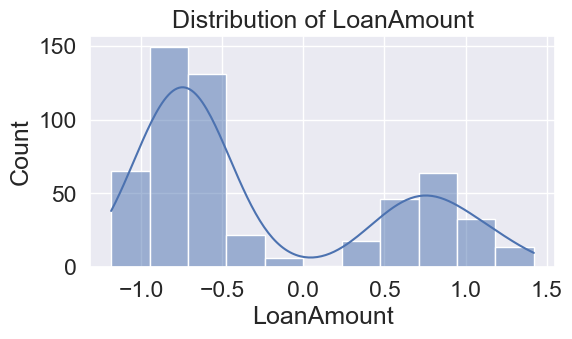

In [66]:
# Visualizing the distribution of the columns after removing skewness
column = 'LoanAmount'
plt.figure(figsize=(6, 3))
sns.histplot(data=df_filtered, x=column, kde=True, color='b')
plt.title(f"Distribution of {column}")

plt.show()

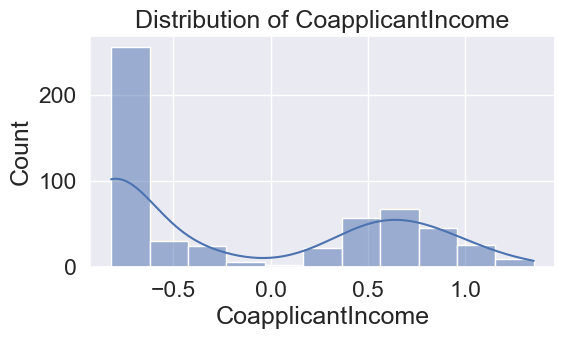

In [67]:
# Visualizing the distribution of the columns after removing skewness
column = 'CoapplicantIncome'
plt.figure(figsize=(6, 3))
sns.histplot(data=df_filtered, x=column, kde=True, color='b')
plt.title(f"Distribution of {column}")

plt.show()

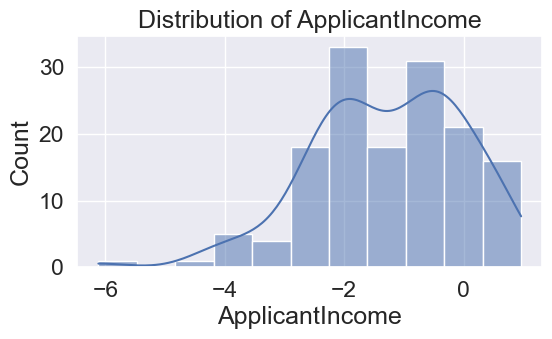

In [68]:
# Visualizing the distribution of the columns after removing skewness
column = 'ApplicantIncome'
plt.figure(figsize=(6, 3))
sns.histplot(data=df_filtered, x=column, kde=True, color='b')
plt.title(f"Distribution of {column}")

plt.show()

## Feature Scaling using Standard Scalarization

### Separating features and label

In [81]:
# Separating the independent and target variables into x and y 
x = df_filtered.drop('Loan_Status', axis=1)
y = df_filtered['Loan_Status']

print(f"Feature Dimension = {x.shape}")
print(f"Label Dimension = {y.shape}")

Feature Dimension = (549, 13)
Label Dimension = (549,)


## Scaling

In [82]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Scaling the data 
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)

display(x.head())

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,p_area_Rural,p_area_Semiurban,p_area_Urban
0,0.480564,-1.352737,-0.736634,-0.540152,-0.372833,-1.714399,-0.932045,-0.461116,0.235168,0.4039,-0.652667,-0.774973,1.437720
1,0.480564,0.739242,0.266870,-0.540152,-0.372833,0.000000,-0.280559,-0.461116,0.235168,0.4039,1.532175,-0.774973,-0.695546
2,0.480564,0.739242,-0.736634,-0.540152,2.682169,0.000000,-0.932045,-0.989961,0.235168,0.4039,-0.652667,-0.774973,1.437720
3,0.480564,0.739242,-0.736634,1.851329,-0.372833,0.000000,1.051932,-0.569528,0.235168,0.4039,-0.652667,-0.774973,1.437720
4,0.480564,-1.352737,-0.736634,-0.540152,-0.372833,-1.331951,-0.932045,-0.159455,0.235168,0.4039,-0.652667,-0.774973,1.437720


## Muticollinearity Analysis and Feature Selection

### Checking VIF

In [83]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

print("Checking for NaNs:\n", x.isna().sum())
print("Checking for infinite values:\n", np.isinf(x).sum())


x_filled = x.fillna(x.mean())

x_cleaned = x_filled.replace([np.inf, -np.inf], np.nan).dropna()

vif = pd.DataFrame()
vif['Features'] = x_cleaned.columns
vif['VIF values'] = [variance_inflation_factor(x_cleaned.values, i) for i in range(len(x_cleaned.columns))]

# Sort VIF values in descending order
vif_sorted = vif.sort_values(by='VIF values', ascending=False)

vif_sorted

Checking for NaNs:
 Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
p_area_Rural         0
p_area_Semiurban     0
p_area_Urban         0
dtype: int64
Checking for infinite values:
 Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
p_area_Rural         0
p_area_Semiurban     0
p_area_Urban         0
dtype: int64


,Features,VIF values
10,p_area_Rural,inf
11,p_area_Semiurban,inf
12,p_area_Urban,inf
1,Married,1.371912
0,Gender,1.229480
6,CoapplicantIncome,1.201216
2,Dependents,1.197927
7,LoanAmount,1.183186
3,Education,1.061054
8,Loan_Amount_Term,1.054582


Now there is no value greater than 10 and we can proceed with the model building

#### Imputing the Applicant income null columns with its mean , Since there were some null values

In [77]:
# Calculate the mean of 'ApplicantIncome' excluding NaN values
mean_income = df_filtered['ApplicantIncome'].mean()

# Impute NaN values in 'ApplicantIncome' with the calculated mean
df_filtered['ApplicantIncome'].fillna(mean_income, inplace=True)

# Print the updated DataFrame
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,p_area_Rural,p_area_Semiurban,p_area_Urban
0,0.476331,-1.359699,-0.748516,-0.527162,-0.386790,0.090218,-0.547446,-0.208089,0.277546,0.39841,0.670173,0,0,1
1,0.476331,0.735457,0.247232,-0.527162,-0.386790,-0.125725,-0.040696,-0.208089,0.277546,0.39841,-1.492153,1,0,0
2,0.476331,0.735457,-0.748516,-0.527162,2.585384,-0.395740,-0.547446,-0.964869,0.277546,0.39841,0.670173,0,0,1
3,0.476331,0.735457,-0.748516,1.896952,-0.386790,-0.466868,0.244939,-0.305738,0.277546,0.39841,0.670173,0,0,1
4,0.476331,-1.359699,-0.748516,-0.527162,-0.386790,0.115974,-0.547446,-0.049410,0.277546,0.39841,0.670173,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,-2.099383,-1.359699,-0.748516,-0.527162,-0.386790,-0.412797,-0.547446,-0.903839,0.277546,0.39841,0.670173,1,0,0
610,0.476331,0.735457,2.238728,-0.527162,-0.386790,-0.207088,-0.547446,-1.282229,-2.485302,0.39841,0.670173,1,0,0
611,0.476331,0.735457,0.247232,-0.527162,-0.386790,0.469398,-0.466796,1.317676,0.277546,0.39841,0.670173,0,0,1
612,0.476331,0.735457,1.242980,-0.527162,-0.386790,0.385989,-0.547446,0.512072,0.277546,0.39841,0.670173,0,0,1


In [84]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 549 entries, 0 to 613
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             549 non-null    float64
 1   Married            549 non-null    float64
 2   Dependents         549 non-null    float64
 3   Education          549 non-null    float64
 4   Self_Employed      549 non-null    float64
 5   ApplicantIncome    549 non-null    float64
 6   CoapplicantIncome  549 non-null    float64
 7   LoanAmount         549 non-null    float64
 8   Loan_Amount_Term   549 non-null    float64
 9   Credit_History     549 non-null    float64
 10  Loan_Status        549 non-null    int64  
 11  p_area_Rural       549 non-null    int32  
 12  p_area_Semiurban   549 non-null    int32  
 13  p_area_Urban       549 non-null    int32  
dtypes: float64(10), int32(3), int64(1)
memory usage: 57.9 KB


## Balancing the Dataset

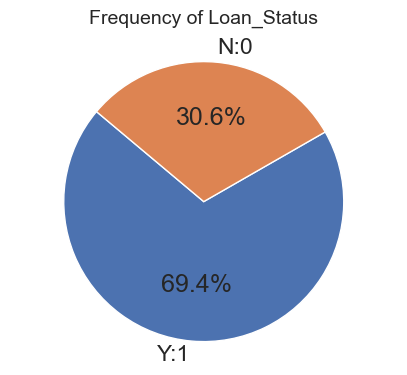

In [85]:
# Count the frequencies of target
target_counts = y.value_counts()

# Create a pie plot
plt.figure(figsize=(5, 4))
plt.pie(target_counts, labels=['Y:1', 'N:0'], autopct='%1.1f%%', startangle=140)

plt.title("Frequency of Loan_Status", size=14, y=1.05)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [86]:
# Oversampling the data
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x1, y1 = SM.fit_resample(x, y)

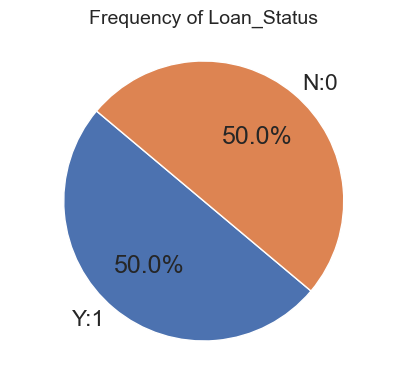

In [89]:
# Count the frequencies of target
target_counts = y1.value_counts()

# Create a pie plot
plt.figure(figsize=(5, 4))
plt.pie(target_counts, labels=['Y:1', 'N:0'], autopct='%1.1f%%', startangle=140)

plt.title("Frequency of Loan_Status", size=14, y=1.05)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

#### Now the dataset is balanced and we can proceed ahead with model building

In [90]:
X=x1
Y=y1

# 3.Modelling 

## Finding the best random state

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

def find_best_random_state(model, x, y):
    best_acc = 0
    best_random_state = 0

    for i in range(1,200):
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=i)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        acc = accuracy_score(y_test, y_pred)
        if acc > best_acc:
            best_acc = acc
            best_random_state = i
            
    return [best_random_state, best_acc]

In [92]:
%%time
# Build the model
model = RandomForestClassifier()
random_state, acc = find_best_random_state(model, X, Y) 
print(f"Best accuracy is {round(acc,4)} at random_state {random_state}")

Best accuracy is 0.8777 at random_state 29
CPU times: total: 8.16 s
Wall time: 24.2 s


Best accuracy is 87.77% at random state 29

## Creating train test split

In [93]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=random_state)
print("x_train shape: ", x_train.shape)
print("x_test shape:  ", x_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape:  ", y_test.shape)

x_train shape:  (533, 13)
x_test shape:   (229, 13)
y_train shape:  (533,)
y_test shape:   (229,)


## Classification Algorithms

In [94]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score, StratifiedKFold

In [95]:
# Functions 
def calc_accuracy(model, id_model):
    ''' Calculate the accuracy of the model. Return the accuracy, training accuracy, and the predicted values.'''
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    acc = accuracy_score(y_test, y_pred)
    acc_train = model.score(x_train, y_train)
    
    print(f"\nModel: {id_model}")
    print(f"Confusion matrix: \n {confusion_matrix(y_test, y_pred)}")
    print(f"Classification report: \n {classification_report(y_test, y_pred)}" )
    print(f"Training Accuracy using {id_model} is {acc_train*100.0:.2f}%")
    print(f"The accuracy score using {id_model} is {round(acc*100.0, 2)}%")
    
    return [acc, acc_train, y_pred]

In [97]:
models = {'RandomForestClassifier' : RandomForestClassifier(), 
          'ExtraTreesClassifier': ExtraTreesClassifier(),
          'LogisticRegression': LogisticRegression(),
          'SVC': SVC(),
          'GradientBoostingClassifier': GradientBoostingClassifier(), 
          'AdaBoostClassifier': AdaBoostClassifier(), 
          'BaggingClassifier': BaggingClassifier()}

# Setting up for saving the results of each model
df_model = pd.DataFrame(columns=['id','Model','Training Accuracy','Model Accuracy Score'])
y_pred = {}

### RandomForestClassifier

In [98]:
%%time
id_model = 'RandomForestClassifier'
model = models[id_model]

# Calculating accuracy metrics
acc, acc_train, pred = calc_accuracy(model, id_model)

# Saving the results
model_metrics = {'id': id_model, 'Model': model,'Training Accuracy': acc_train,'Model Accuracy Score': acc}
model_df = pd.DataFrame([model_metrics])
df_model = pd.concat([df_model, model_df], ignore_index=True)
y_pred[id_model] = pred


Model: RandomForestClassifier
Confusion matrix: 
 [[105  13]
 [ 12  99]]
Classification report: 
               precision    recall  f1-score   support

           0       0.90      0.89      0.89       118
           1       0.88      0.89      0.89       111

    accuracy                           0.89       229
   macro avg       0.89      0.89      0.89       229
weighted avg       0.89      0.89      0.89       229

Training Accuracy using RandomForestClassifier is 100.00%
The accuracy score using RandomForestClassifier is 89.08%
CPU times: total: 15.6 ms
Wall time: 160 ms


### Extra Trees Classifier

In [99]:
%%time
id_model = 'ExtraTreesClassifier'
model = models[id_model]

# Calculating accuracy metrics
acc, acc_train, pred = calc_accuracy(model, id_model)

# Saving the results
model_metrics = {'id': id_model, 'Model': model,'Training Accuracy': acc_train,'Model Accuracy Score': acc}
model_df = pd.DataFrame([model_metrics])
df_model = pd.concat([df_model, model_df], ignore_index=True)
y_pred[id_model] = pred


Model: ExtraTreesClassifier
Confusion matrix: 
 [[104  14]
 [ 11 100]]
Classification report: 
               precision    recall  f1-score   support

           0       0.90      0.88      0.89       118
           1       0.88      0.90      0.89       111

    accuracy                           0.89       229
   macro avg       0.89      0.89      0.89       229
weighted avg       0.89      0.89      0.89       229

Training Accuracy using ExtraTreesClassifier is 100.00%
The accuracy score using ExtraTreesClassifier is 89.08%
CPU times: total: 0 ns
Wall time: 124 ms


### Logistic Regression

In [100]:
%%time

id_model = 'LogisticRegression'
model = models[id_model]

# Calculating accuracy metrics
acc, acc_train, pred = calc_accuracy(model, id_model)

# Saving the results
model_metrics = {'id': id_model, 'Model': model,'Training Accuracy': acc_train,'Model Accuracy Score': acc}
model_df = pd.DataFrame([model_metrics])
df_model = pd.concat([df_model, model_df], ignore_index=True)
y_pred[id_model] = pred


Model: LogisticRegression
Confusion matrix: 
 [[80 38]
 [17 94]]
Classification report: 
               precision    recall  f1-score   support

           0       0.82      0.68      0.74       118
           1       0.71      0.85      0.77       111

    accuracy                           0.76       229
   macro avg       0.77      0.76      0.76       229
weighted avg       0.77      0.76      0.76       229

Training Accuracy using LogisticRegression is 71.67%
The accuracy score using LogisticRegression is 75.98%
CPU times: total: 0 ns
Wall time: 14 ms


### Support Vector Machine Classifier

In [101]:
%%time

id_model = 'SVC'
model = models[id_model]

# Calculating accuracy metrics
acc, acc_train, pred = calc_accuracy(model, id_model)

# Saving the results
model_metrics = {'id': id_model, 'Model': model,'Training Accuracy': acc_train,'Model Accuracy Score': acc}
model_df = pd.DataFrame([model_metrics])
df_model = pd.concat([df_model, model_df], ignore_index=True)
y_pred[id_model] = pred


Model: SVC
Confusion matrix: 
 [[85 33]
 [17 94]]
Classification report: 
               precision    recall  f1-score   support

           0       0.83      0.72      0.77       118
           1       0.74      0.85      0.79       111

    accuracy                           0.78       229
   macro avg       0.79      0.78      0.78       229
weighted avg       0.79      0.78      0.78       229

Training Accuracy using SVC is 81.43%
The accuracy score using SVC is 78.17%
CPU times: total: 15.6 ms
Wall time: 29 ms


### Gradient Boosting Classifier

In [102]:
%%time

id_model = 'GradientBoostingClassifier'
model = models[id_model]

# Calculating accuracy metrics
acc, acc_train, pred = calc_accuracy(model, id_model)

# Saving the results
model_metrics = {'id': id_model, 'Model': model,'Training Accuracy': acc_train,'Model Accuracy Score': acc}
model_df = pd.DataFrame([model_metrics])
df_model = pd.concat([df_model, model_df], ignore_index=True)
y_pred[id_model] = pred


Model: GradientBoostingClassifier
Confusion matrix: 
 [[94 24]
 [13 98]]
Classification report: 
               precision    recall  f1-score   support

           0       0.88      0.80      0.84       118
           1       0.80      0.88      0.84       111

    accuracy                           0.84       229
   macro avg       0.84      0.84      0.84       229
weighted avg       0.84      0.84      0.84       229

Training Accuracy using GradientBoostingClassifier is 89.12%
The accuracy score using GradientBoostingClassifier is 83.84%
CPU times: total: 62.5 ms
Wall time: 140 ms


### AdaBoost Classifier

In [103]:
%%time

id_model = 'AdaBoostClassifier'
model = models[id_model]

# Calculating accuracy metrics
acc, acc_train, pred = calc_accuracy(model, id_model)

# Saving the results
model_metrics = {'id': id_model, 'Model': model,'Training Accuracy': acc_train,'Model Accuracy Score': acc}
model_df = pd.DataFrame([model_metrics])
df_model = pd.concat([df_model, model_df], ignore_index=True)
y_pred[id_model] = pred


Model: AdaBoostClassifier
Confusion matrix: 
 [[85 33]
 [13 98]]
Classification report: 
               precision    recall  f1-score   support

           0       0.87      0.72      0.79       118
           1       0.75      0.88      0.81       111

    accuracy                           0.80       229
   macro avg       0.81      0.80      0.80       229
weighted avg       0.81      0.80      0.80       229

Training Accuracy using AdaBoostClassifier is 81.99%
The accuracy score using AdaBoostClassifier is 79.91%
CPU times: total: 15.6 ms
Wall time: 89.6 ms


### Bagging Classifier

In [104]:
%%time

id_model = 'BaggingClassifier'
model = models[id_model]

# Calculating accuracy metrics
acc, acc_train, pred = calc_accuracy(model, id_model)

# Saving the results
model_metrics = {'id': id_model, 'Model': model,'Training Accuracy': acc_train,'Model Accuracy Score': acc}
model_df = pd.DataFrame([model_metrics])
df_model = pd.concat([df_model, model_df], ignore_index=True)
y_pred[id_model] = pred


Model: BaggingClassifier
Confusion matrix: 
 [[103  15]
 [ 23  88]]
Classification report: 
               precision    recall  f1-score   support

           0       0.82      0.87      0.84       118
           1       0.85      0.79      0.82       111

    accuracy                           0.83       229
   macro avg       0.84      0.83      0.83       229
weighted avg       0.84      0.83      0.83       229

Training Accuracy using BaggingClassifier is 98.50%
The accuracy score using BaggingClassifier is 83.41%
CPU times: total: 15.6 ms
Wall time: 39.2 ms


# Comparing models

In [105]:
df_model = df_model.sort_values(by='Model Accuracy Score', ascending=False)
display(df_model)

,id,Model,Training Accuracy,Model Accuracy Score
0,RandomForestClassifier,"(DecisionTreeClassifier(max_features='sqrt', r...",1.000000,0.890830
1,ExtraTreesClassifier,"(ExtraTreeClassifier(random_state=1967146252),...",1.000000,0.890830
4,GradientBoostingClassifier,([DecisionTreeRegressor(criterion='friedman_ms...,0.891182,0.838428
6,BaggingClassifier,(DecisionTreeClassifier(random_state=160185993...,0.984991,0.834061
5,AdaBoostClassifier,"(DecisionTreeClassifier(max_depth=1, random_st...",0.819887,0.799127
3,SVC,SVC(),0.814259,0.781659
2,LogisticRegression,LogisticRegression(),0.716698,0.759825


### Cross validation score

In [107]:
def checking_cvscore(id_model, model, y_pred):
    score = cross_val_score(model, X, Y, cv=5, scoring='accuracy')
    
    score_mean = score.mean()
    diff = accuracy_score(y_test, y_pred) - score_mean
    
    print(f"\n::: Model: {id_model}::: \nscore:{score}")
    print(f"Score mean: {score_mean:.4f}")
    print(f"Difference between Accuracy score and cross validation score is {diff:.4f}")
    return [score_mean, diff]

In [109]:
# Define the new columns for CV metrics
df_model['CV score mean'] = np.NaN
df_model['Diff Acc and cv score'] = np.NaN
# Setting the id model as index
df_model.set_index("id", inplace=True)

In [110]:
%%time
# Evaluate cross-validation for each model and save the scores.
for id_model, model in models.items():
    score_mean, diff = checking_cvscore(id_model, model, y_pred[id_model])
    
    df_model.loc[id_model, 'CV score mean'] = score_mean
    df_model.loc[id_model, 'Diff Acc and cv score'] = diff


::: Model: RandomForestClassifier::: 
score:[0.76470588 0.77124183 0.81578947 0.86842105 0.85526316]
Score mean: 0.8151
Difference between Accuracy score and cross validation score is 0.0757

::: Model: ExtraTreesClassifier::: 
score:[0.73202614 0.83660131 0.78947368 0.82894737 0.81578947]
Score mean: 0.8006
Difference between Accuracy score and cross validation score is 0.0903

::: Model: LogisticRegression::: 
score:[0.69281046 0.7124183  0.69078947 0.68421053 0.69078947]
Score mean: 0.6942
Difference between Accuracy score and cross validation score is 0.0656

::: Model: SVC::: 
score:[0.76470588 0.76470588 0.72368421 0.75657895 0.78947368]
Score mean: 0.7598
Difference between Accuracy score and cross validation score is 0.0218

::: Model: GradientBoostingClassifier::: 
score:[0.69934641 0.75816993 0.80921053 0.86184211 0.84210526]
Score mean: 0.7941
Difference between Accuracy score and cross validation score is 0.0443

::: Model: AdaBoostClassifier::: 
score:[0.67320261 0.705882

In [111]:
# Present the metrics to eval the best model
df_model.sort_values(by=['Model Accuracy Score', 'CV score mean','Diff Acc and cv score'], ascending=[False, False, True])

,Model,Training Accuracy,Model Accuracy Score,CV score mean,Diff Acc and cv score
id,,,,,
RandomForestClassifier,"(DecisionTreeClassifier(max_features='sqrt', r...",1.000000,0.890830,0.815084,0.075745
ExtraTreesClassifier,"(ExtraTreeClassifier(random_state=1967146252),...",1.000000,0.890830,0.800568,0.090262
GradientBoostingClassifier,([DecisionTreeRegressor(criterion='friedman_ms...,0.891182,0.838428,0.794135,0.044293
BaggingClassifier,(DecisionTreeClassifier(random_state=160185993...,0.984991,0.834061,0.765205,0.068856
AdaBoostClassifier,"(DecisionTreeClassifier(max_depth=1, random_st...",0.819887,0.799127,0.748185,0.050941
SVC,SVC(),0.814259,0.781659,0.759830,0.021830
LogisticRegression,LogisticRegression(),0.716698,0.759825,0.694204,0.065622


After cross validation we find out that the highest scoring algorithm is Randomforestclassifier by looking at the CV score mean

## Hyper Parameter Tuning

In [112]:
random_state


29

In [113]:
model = RandomForestClassifier()
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [117]:
# ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {'bootstrap':[True, False],
             'criterion':['gini', 'entropy'],
             'random_state': [50, 155, 1000],
             'max_depth':[0, 10, 20],
             'n_jobs': [-2, -1, 1],
             'n_estimators': [50, 100, 200, 300]}

# Build the model 
model = RandomForestClassifier()

In [118]:
%%time 

# Perform search with cross validation
grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1)
grid_search.fit(x_train, y_train)

CPU times: total: 391 ms
Wall time: 32.4 s


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 10, 20],
                         'n_estimators': [50, 100, 200, 300],
                         'n_jobs': [-2, -1, 1],
                         'random_state': [50, 155, 1000]})

In [119]:
# Get the best hyperparameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Parameters for RandomforestClassifier model:")
best_params

Best Parameters for RandomforestClassifier model:


{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 10,
 'n_estimators': 100,
 'n_jobs': -2,
 'random_state': 50}

In [120]:
best_model

RandomForestClassifier(max_depth=10, n_jobs=-2, random_state=50)

# Final Model

In [121]:
# Create the model with the best parameters
best_model = ExtraTreesClassifier (criterion = 'gini', 
                                   max_depth = 10, 
                                   n_estimators = 100, 
                                   n_jobs = -2, 
                                   random_state = 50)

best_model.fit(x_train, y_train)
y_pred = best_model.predict(x_test)

# Check the accuracy
acc = accuracy_score(y_test, y_pred)
print(f"accuracy_score: {round(acc*100,2)}%")

accuracy_score: 85.15%


# Conclusion:

•After hyper parameter tuning the best model was Random forest classifier with the accuracy of 85.15%

•Dropping missing values represented the elimination of 4.89% of the data, 30 rows were dropped.
•
Managing the outliers represented the elimination of 5.99% of the total records (35 rows).